In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Simulate Data
np.random.seed(42)

In [3]:
n_visitors = 1000
# A = Blue button group
# B = Green button group

In [4]:
# Simulate 1000 users per group
group_A = pd.DataFrame({
    'group':'A',
    'clicked':np.random.binomial(1, 0.12, n_visitors) 
})

In [5]:
group_B = pd.DataFrame({
    'group':'B',
    'clicked':np.random.binomial(1, 0.16, n_visitors)
})

In [6]:
# combine
data = pd.concat([group_A, group_B])

In [7]:
# Summary
summary = data.groupby('group')['clicked'].agg(['mean', 'sum', 'count'])
summary.columns = ['CTR', 'Total Clicks', 'Total Users']
print('Summary Statistics:\n', summary)

Summary Statistics:
          CTR  Total Clicks  Total Users
group                                  
A      0.124           124         1000
B      0.163           163         1000


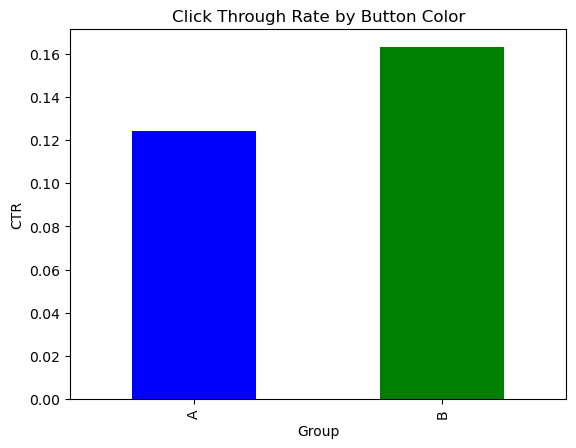

In [8]:
# plot
summary['CTR'].plot(kind='bar', color=['blue', 'green'], title='Click Through Rate by Button Color')
plt.ylabel('CTR')
plt.xlabel('Group')
plt.show()

In [9]:
# Statistical Test (Chi-Squared Test)
contingency_table = pd.crosstab(data['group'], data['clicked'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

In [10]:
print("\nChi-squared Test Results:")
print("Contingency Table:\n", contingency_table)
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print("Statistically Significant Difference?", "✅ Yes" if p < 0.05 else "❌ No")


Chi-squared Test Results:
Contingency Table:
 clicked    0    1
group            
A        876  124
B        837  163
Chi2 Statistic: 5.8743
P-Value: 0.0154
Statistically Significant Difference? ✅ Yes


RESULT
- We tested 1,000 users per button. Green button got more clicks, and
- the stats say this isn’t just luck — it’s real. You should probably use the green one!